In [24]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# library

import pandas as pd
import numpy as np
import nltk
nltk.download('all')
from matplotlib import pyplot as plt
from seaborn import heatmap

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [26]:
# import Dataset

file_path = '/content/drive/MyDrive/Side Project/Side_Project/Beer Data Analysis/datasets/datasets/BeerDataScienceProject.tar.bz2'
df = pd.read_csv(file_path, compression = "bz2")
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206



### 1.Rank the top 3 breweries which produce the strongest beers

In [27]:
def top_n_breweries_by_ABS(n:int):
    breweries_and_ABV = df[['beer_ABV', 'beer_beerId', 'beer_brewerId']].groupby('beer_brewerId')['beer_ABV'].mean().sort_values(ascending = False).reset_index()
    breweries_and_ABV['rank'] = breweries_and_ABV['beer_ABV'].rank(method = 'dense', ascending = False)
    result = breweries_and_ABV[breweries_and_ABV['rank'] <= n]
    return result

In [28]:
top_n_breweries_by_ABS(3)

,beer_brewerId,beer_ABV,rank
0,6513,19.228824,1.0
1,736,13.750000,2.0
2,24215,12.466667,3.0


,beer_brewerId,beer_ABV,rank
0,6513,19.228824,1.0
1,736,13.750000,2.0
2,24215,12.466667,3.0


### 2. Which year did beers enjoy the highest ratings?

In [29]:
def convert_int_to_date(df:pd.DataFrame, col:str):
    datetime = pd.to_datetime(df[col], unit = 's')
    res = datetime.dt.year
    return res

In [30]:
df['year'] = convert_int_to_date(df,'review_time')
df['year'].head()

0    2009
1    2009
2    2009
3    2009
4    2010
Name: year, dtype: int64

0    2009
1    2009
2    2009
3    2009
4    2010
Name: year, dtype: int64

In [31]:
df['ratings'] = df['review_appearance'] + df['review_palette'] + df['review_overall'] + df['review_taste'] + df['review_aroma']
df.groupby('year')['ratings'].sum().sort_values(ascending = False).head(1)

year
2011    2119537.0
Name: ratings, dtype: float64

year
2011    2119537.0
Name: ratings, dtype: float64

In [32]:
year_overall_review = df[['year', 'review_overall']]
total_num_of_reviews = year_overall_review.groupby('year').count().reset_index().rename(columns = {'review_overall':'total_num_of_reviews'})
mean_review_overall = year_overall_review.groupby('year')['review_overall'].mean().reset_index().rename(columns = {'review_overall':'mean_review_overall'})
res = pd.merge(total_num_of_reviews, mean_review_overall, how = 'inner')
res

,year,total_num_of_reviews,mean_review_overall
0,1998,23,3.891304
1,1999,25,4.000000
2,2000,33,4.181818
3,2001,602,3.927741
4,2002,7581,3.798905
5,2003,18187,3.752900
6,2004,22905,3.794630
7,2005,29433,3.832042
8,2006,43083,3.798192
9,2007,46514,3.809552


,year,total_num_of_reviews,mean_review_overall
0,1998,23,3.891304
1,1999,25,4.000000
2,2000,33,4.181818
3,2001,602,3.927741
4,2002,7581,3.798905
5,2003,18187,3.752900
6,2004,22905,3.794630
7,2005,29433,3.832042
8,2006,43083,3.798192
9,2007,46514,3.809552


In [33]:
res = res.set_index('year')

Text(0, 0.5, 'mean_review_overall')

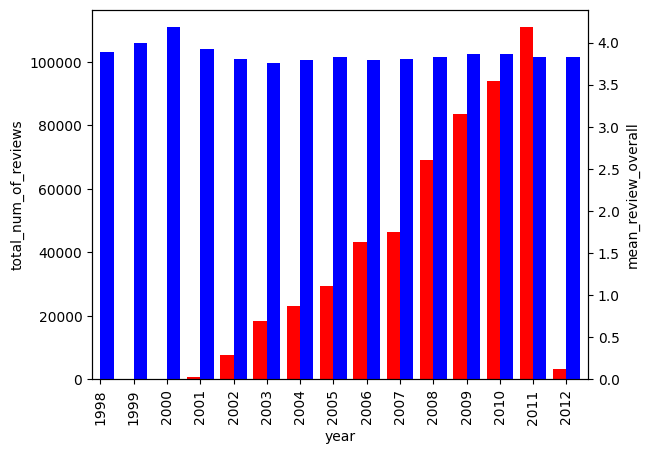

Text(0, 0.5, 'mean_review_overall')

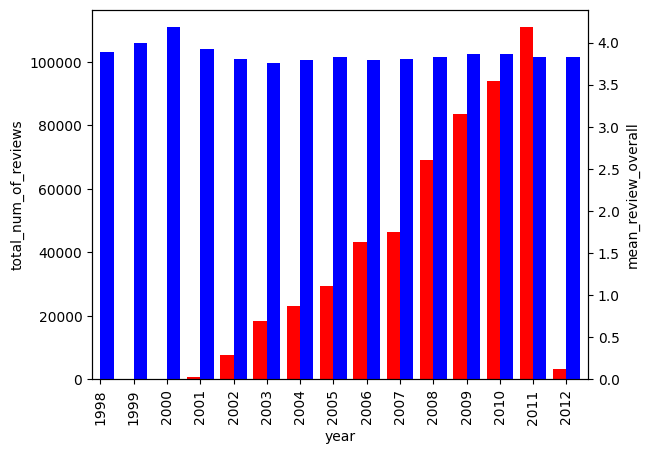

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

res.total_num_of_reviews.plot(kind = 'bar', color = 'red', ax = ax, width = width, position = 1)
res.mean_review_overall.plot(kind = 'bar', color = 'blue', ax = ax2, width = width, position = 0)

ax.set_ylabel('total_num_of_reviews')
ax2.set_ylabel('mean_review_overall')

### 3. Based on the users' ratings, which factors are important among taste, aroma, appearance and palette?

In [35]:
# review overall과의 연관성

def correlation(col1:str, col2:str):
    if len(df[col1]) == len(df[col2]):

        sum_col1_col2 = sum((df[col1] - df[col1].mean()) - (df[col2] - df[col2].mean()))
        sum_col1_squared = sum(df[col1] - df[col1].mean()**2)
        sum_col2_squared = sum(df[col2] - df[col2].mean()**2)
        corr = sum_col1_col2 / np.sqrt(sum_col1_squared * sum_col2_squared)
        return corr


In [36]:
correlation('review_overall', 'review_palette')

2.236332955418899e-15

2.236332955418899e-15

In [37]:
corr_df = df[['review_appearance', 'review_palette', 'review_overall', 'review_taste', 'review_aroma']]
corr_df.corr(method = 'pearson')

,review_appearance,review_palette,review_overall,review_taste,review_aroma
review_appearance,1.000000,0.547691,0.486687,0.554775,0.534244
review_palette,0.547691,1.000000,0.601971,0.604271,0.706156
review_overall,0.486687,0.601971,1.000000,0.692454,0.783002
review_taste,0.554775,0.604271,0.692454,1.000000,0.725273
review_aroma,0.534244,0.706156,0.783002,0.725273,1.000000


,review_appearance,review_palette,review_overall,review_taste,review_aroma
review_appearance,1.000000,0.547691,0.486687,0.554775,0.534244
review_palette,0.547691,1.000000,0.601971,0.604271,0.706156
review_overall,0.486687,0.601971,1.000000,0.692454,0.783002
review_taste,0.554775,0.604271,0.692454,1.000000,0.725273
review_aroma,0.534244,0.706156,0.783002,0.725273,1.000000


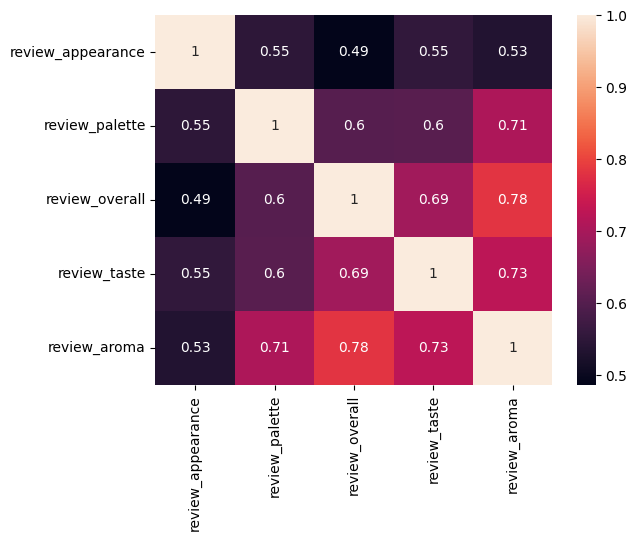

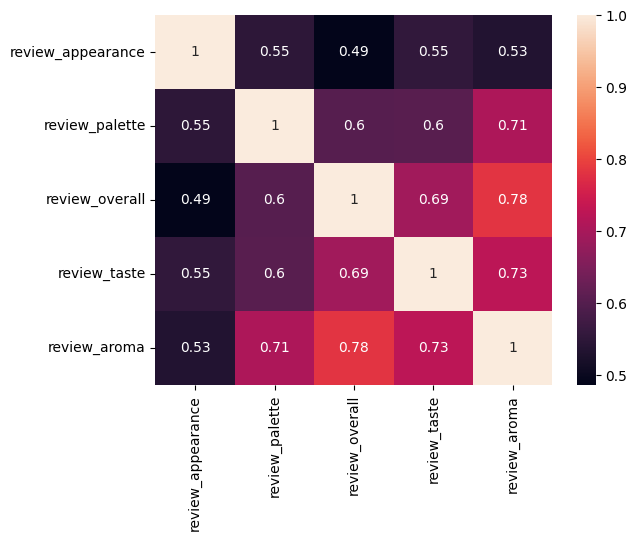

In [38]:
_ = heatmap(data=corr_df.corr(), annot=True)

### 4. If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?

In [39]:
# number of users, review_overall

temp = df.groupby(['beer_beerId'])['review_overall'].agg(['count', 'mean']).reset_index()
temp.head()

,beer_beerId,count,mean
0,3,3,4.166667
1,4,10,3.700000
2,5,424,3.549528
3,6,877,3.706956
4,7,659,3.266313


,beer_beerId,count,mean
0,3,3,4.166667
1,4,10,3.700000
2,5,424,3.549528
3,6,877,3.706956
4,7,659,3.266313


In [40]:
temp.describe()

,beer_beerId,count,mean
count,20200.000000,20200.000000,20200.000000
mean,39720.080990,26.181683,3.651862
std,22621.433795,123.799950,0.631129
min,3.000000,1.000000,1.000000
25%,19925.750000,1.000000,3.399774
50%,40712.500000,2.000000,3.750000
75%,59531.250000,7.000000,4.000000
max,77310.000000,3000.000000,5.000000


,beer_beerId,count,mean
count,20200.000000,20200.000000,20200.000000
mean,39720.080990,26.181683,3.651862
std,22621.433795,123.799950,0.631129
min,3.000000,1.000000,1.000000
25%,19925.750000,1.000000,3.399774
50%,40712.500000,2.000000,3.750000
75%,59531.250000,7.000000,4.000000
max,77310.000000,3000.000000,5.000000


In [41]:
res = temp[temp['count']>=200].sort_values(by='mean', ascending = False).head(3)

In [42]:
top_3_id = [id for id in res['beer_beerId']]

In [43]:
dic = {}

df2 = df[['beer_beerId', 'beer_name', 'beer_ABV']]

for beer_id, sub in df2.groupby('beer_beerId'):
    if beer_id in top_3_id:
        beer_name = set([n for n in sub['beer_name']])
        beer_abv = set([a for a in sub['beer_ABV']])

        for name in beer_name:
            for abv in beer_abv:
                if name not in dic.keys():
                    dic[name] = abv

print(dic)

{'Heady Topper': 8.0, 'Founders CBS Imperial Stout': 10.6, 'Citra DIPA': 8.0}
{'Heady Topper': 8.0, 'Founders CBS Imperial Stout': 10.6, 'Citra DIPA': 8.0}


In [44]:
review_df = df[['review_text']].reset_index()
review_df.head()

,index,review_text
0,0,A lot of foam. But a lot. In the smell some ba...
1,1,"Dark red color, light beige foam, average. In ..."
2,2,"Almost totally black. Beige foam, quite compac..."
3,3,"Golden yellow color. White, compact foam, quit..."
4,4,"According to the website, the style for the Ca..."


,index,review_text
0,0,A lot of foam. But a lot. In the smell some ba...
1,1,"Dark red color, light beige foam, average. In ..."
2,2,"Almost totally black. Beige foam, quite compac..."
3,3,"Golden yellow color. White, compact foam, quit..."
4,4,"According to the website, the style for the Ca..."


In [45]:
# vader

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [71]:
res = {}
for i, row in tqdm(review_df.iterrows(), total = len(review_df)):
    text = row['review_text']
    idx = row['index']
    if type(text) == str:
        res[idx] = sia.polarity_scores(text)
    else:
        res[idx] = 'unvalid review type'

  0%|          | 0/528870 [00:00<?, ?it/s]

In [77]:
vaders = pd.DataFrame(res).T
vaders.head()

,neg,neu,pos,compound
0,0.062,0.861,0.077,0.1879
1,0.03,0.879,0.091,0.5927
2,0.118,0.749,0.133,0.3021
3,0.0,0.672,0.328,0.9772
4,0.034,0.846,0.12,0.9538


In [99]:
df_1 = df.reset_index()
df_2 = vaders.reset_index()

final = pd.merge(df_1, df_2, how = 'inner')
final.head()

,index,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,year,ratings,neg,neu,pos,compound
0,0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009,9.0,0.062,0.861,0.077,0.1879
1,1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009,14.5,0.03,0.879,0.091,0.5927
2,2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009,14.5,0.118,0.749,0.133,0.3021
3,3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009,15.0,0.0,0.672,0.328,0.9772
4,4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010,21.0,0.034,0.846,0.12,0.9538
